Configurações i:

In [ ]:
## importando bibliotecas principais
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = "https://github.com/barbaraperez/Estudo-do-diabetes/blob/main/datateste_diabetes1.5.xlsx?raw=true" # salva o link da nossa tabela de dados armazenados em arquivo xlsx no github em uma variável
df = pd.read_excel(url, header=0) #pede para o pandas criar um dataframe com esses dados

In [ ]:
print(df.shape) ## número de linhas e colunas dos nossos dados

(66, 7)


In [ ]:
print(df.dtypes) ## tipo dos dados de cada coluna

ano                        int64
pais                      object
idh                      float64
populacao_geral            int64
per_crian_cinc_soprep    float64
kcal_medio                 int64
diabeticos               float64
dtype: object


In [ ]:
print(df.describe()) ## estatísticas descritivas dos dados

               ano        idh  populacao_geral  per_crian_cinc_soprep  \
count    66.000000  60.000000     6.600000e+01              63.000000   
mean   2010.500000   0.784750     8.477532e+07               9.909524   
std       6.392905   0.050022     8.009502e+07               2.392037   
min    2000.000000   0.685000     1.534235e+07               6.200000   
25%    2005.000000   0.756000     1.827441e+07               7.100000   
50%    2010.500000   0.787500     4.102497e+07              10.600000   
75%    2016.000000   0.830250     1.855970e+08              12.050000   
max    2021.000000   0.851000     2.139934e+08              12.900000   

        kcal_medio    diabeticos  
count    66.000000     66.000000  
mean   2415.045455   4531.775606  
std      21.913418   5240.595637  
min    2367.000000    131.100000  
25%    2398.750000   1176.600000  
50%    2414.000000   1638.750000  
75%    2433.000000   7955.975000  
max    2448.000000  15733.600000  


In [ ]:
df.head ## 5 primeiras linhas e 5 últimas linhas

<bound method NDFrame.head of      ano    pais    idh  populacao_geral  per_crian_cinc_soprep  kcal_medio  \
0   2021  Brasil    NaN        213993441                    NaN        2447   
1   2020  Brasil    NaN        212559409                    7.3        2448   
2   2019  Brasil  0.765        211049519                    7.2        2447   
3   2018  Brasil  0.762        209469320                    7.2        2447   
4   2017  Brasil  0.761        207833825                    7.1        2446   
..   ...     ...    ...              ...                    ...         ...   
61  2004   Chile  0.785         16014972                   11.4        2403   
62  2003   Chile  0.776         15849649                   11.5        2397   
63  2002   Chile  0.769         15684413                   11.5        2391   
64  2001   Chile  0.767         15516112                   11.4        2386   
65  2000   Chile  0.756         15342350                   11.3        2378   

    diabeticos  
0   

In [ ]:
print(df.index) 
print()
print(df.columns)

RangeIndex(start=0, stop=66, step=1)

Index(['ano', 'pais', 'idh', 'populacao_geral', 'per_crian_cinc_soprep',
       'kcal_medio', 'diabeticos'],
      dtype='object')


Como vemos acima, as linhas são identificadas por números inteiros de 0 até 66 e as colunas são identificadas por strings, sendo elas:

-   `ano`: ano relativo aqueles dados;
-   `pais`: país de origem daqueles dados;
-   `idh`: Índice de Desenvolvimento Humano daquele país naquele determinado ano;
-   `populacao_geral`: número absoluto de pessoas
-   `per_crian_cinc_soprep`: porcentagem de crianças com 5 anos ou menos que estão com sobrepeso em determinado país em determinado ano
-   `kcal_medio`: necessidade calóriga média em kcal ingerida por dia por pessoas de determinado país em determinado ano
-   `´diabeticos`: número de indivíduos diabéticos em milhar de determinado país a cada ano.

In [ ]:
print(df.loc[20])

ano                           2001
pais                        Brasil
idh                          0.691
populacao_geral          177196051
per_crian_cinc_soprep          6.2
kcal_medio                    2371
diabeticos                  4378.7
Name: 20, dtype: object


In [ ]:
#Removendo as linhas correspondentes aos anos de 2021 e 2020
df_atualizado = df.drop([0, 1, 22, 23, 44, 45], axis=0)
print(df_atualizado)

     ano       pais    idh  populacao_geral  per_crian_cinc_soprep  \
2   2019     Brasil  0.765        211049519                    7.2   
3   2018     Brasil  0.762        209469320                    7.2   
4   2017     Brasil  0.761        207833825                    7.1   
5   2016     Brasil  0.758        206163056                    7.1   
6   2015     Brasil  0.756        204471759                    7.1   
7   2014     Brasil  0.756        202763744                    7.0   
8   2013     Brasil  0.753        201035904                    6.9   
9   2012     Brasil  0.735        199287292                    6.9   
10  2011     Brasil  0.731        197514541                    6.8   
11  2010     Brasil  0.727        195713637                    6.8   
12  2009     Brasil  0.719        193886505                    6.7   
13  2008     Brasil  0.717        192030362                    6.6   
14  2007     Brasil  0.706        190130445                    6.6   
15  2006     Brasil 

Essas linhas referentes a 2020 e 2021 serão removidas porque, durante esses anos, enfrentou-se uma pandemia mundial de COVID-19, assim, os números e condições se diferem muito da realidade analisada em outros anos, logo, é preciso eliminá-las para que o modelo não seja mau influenciado.

Matriz de covariância: 


,ano,idh,populacao_geral,per_crian_cinc_soprep,kcal_medio,diabeticos
ano,4.086923e+01,1.516017e-01,3.354752e+07,1.903226e-01,1.134385e+02,1.006065e+04
idh,1.516017e-01,2.502225e-03,-3.145896e+06,9.714364e-02,2.495593e-01,-1.469969e+02
populacao_geral,3.354752e+07,-3.145896e+06,6.415212e+15,-1.694624e+08,4.574278e+08,3.877948e+11
per_crian_cinc_soprep,1.903226e-01,9.714364e-02,-1.694624e+08,5.721843e+00,-1.535868e+01,-9.830960e+03
kcal_medio,1.134385e+02,2.495593e-01,4.574278e+08,-1.535868e+01,4.801979e+02,6.384021e+04
diabeticos,1.006065e+04,-1.469969e+02,3.877948e+11,-9.830960e+03,6.384021e+04,2.746384e+07




Matriz de correlação: 


,ano,idh,populacao_geral,per_crian_cinc_soprep,kcal_medio,diabeticos
ano,1.000000,0.521189,0.065517,0.013035,0.809752,0.300294
idh,0.521189,1.000000,-0.791759,0.810186,0.231751,-0.582029
populacao_geral,0.065517,-0.791759,1.000000,-0.888172,0.260620,0.923881
per_crian_cinc_soprep,0.013035,0.810186,-0.888172,1.000000,-0.295127,-0.798135
kcal_medio,0.809752,0.231751,0.260620,-0.295127,1.000000,0.555909
diabeticos,0.300294,-0.582029,0.923881,-0.798135,0.555909,1.000000


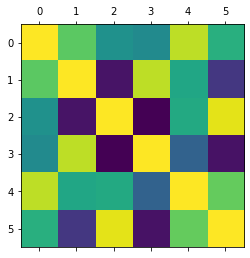

In [ ]:
#matriz de covariancia
df_covariance = df.cov()

# matriz de correlação
df_correlation = df.corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

plt.matshow(df_correlation)
plt.show()

In [ ]:
df_atualizado["diabetes_normalizado"] = df_atualizado["diabeticos"].div(df_atualizado["populacao_geral"].values)
print(df_atualizado)

     ano       pais    idh  populacao_geral  per_crian_cinc_soprep  \
2   2019     Brasil  0.765        211049519                    7.2   
3   2018     Brasil  0.762        209469320                    7.2   
4   2017     Brasil  0.761        207833825                    7.1   
5   2016     Brasil  0.758        206163056                    7.1   
6   2015     Brasil  0.756        204471759                    7.1   
7   2014     Brasil  0.756        202763744                    7.0   
8   2013     Brasil  0.753        201035904                    6.9   
9   2012     Brasil  0.735        199287292                    6.9   
10  2011     Brasil  0.731        197514541                    6.8   
11  2010     Brasil  0.727        195713637                    6.8   
12  2009     Brasil  0.719        193886505                    6.7   
13  2008     Brasil  0.717        192030362                    6.6   
14  2007     Brasil  0.706        190130445                    6.6   
15  2006     Brasil 

Testes de Gráficos:

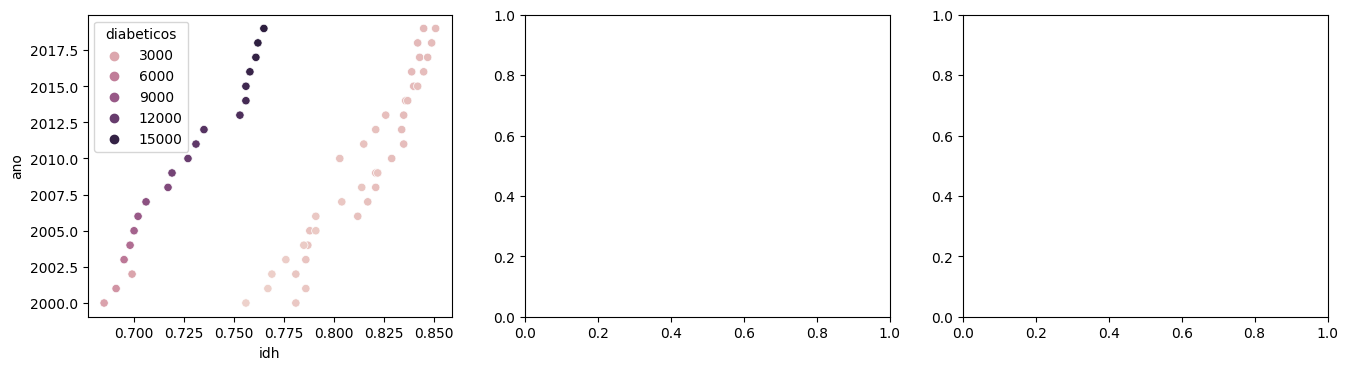

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,4), dpi=100)

sns.scatterplot(data=df_atualizado, x="idh", y="ano", hue='diabeticos', ax=ax[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8859325710>]],
      dtype=object)

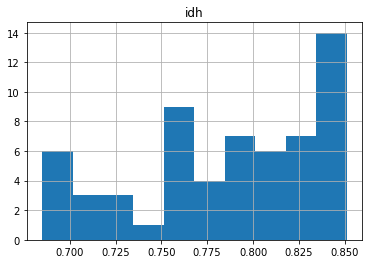

In [ ]:
df_atualizado.hist('idh')

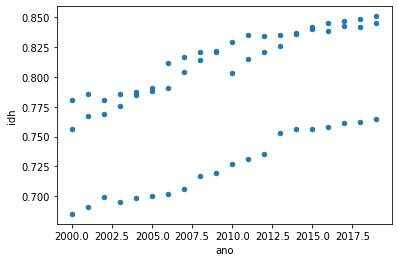

In [ ]:
df_atualizado.plot('ano', 'idh', kind = 'scatter')

In [ ]:
#define index column
#df.set_index('ano', inplace=True)

#group data by product and display sales as line chart
#df.groupby('pais')['idh'].plot(legend=True)

In [ ]:
print(df_atualizado)

     ano       pais    idh  populacao_geral  per_crian_cinc_soprep  \
2   2019     Brasil  0.765        211049519                    7.2   
3   2018     Brasil  0.762        209469320                    7.2   
4   2017     Brasil  0.761        207833825                    7.1   
5   2016     Brasil  0.758        206163056                    7.1   
6   2015     Brasil  0.756        204471759                    7.1   
7   2014     Brasil  0.756        202763744                    7.0   
8   2013     Brasil  0.753        201035904                    6.9   
9   2012     Brasil  0.735        199287292                    6.9   
10  2011     Brasil  0.731        197514541                    6.8   
11  2010     Brasil  0.727        195713637                    6.8   
12  2009     Brasil  0.719        193886505                    6.7   
13  2008     Brasil  0.717        192030362                    6.6   
14  2007     Brasil  0.706        190130445                    6.6   
15  2006     Brasil 

In [ ]:
df_atualizado.describe()

,ano,idh,populacao_geral,per_crian_cinc_soprep,kcal_medio,diabeticos,diabetes_normalizado
count,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000
mean,2009.500000,0.784750,8.398507e+07,9.905000,2413.000000,4344.739833,0.000048
std,5.814943,0.050022,7.943070e+07,2.396991,21.527279,5048.943586,0.000021
min,2000.000000,0.685000,1.534235e+07,6.200000,2367.000000,131.100000,0.000009
25%,2004.750000,0.756000,1.791676e+07,7.075000,2396.750000,1109.325000,0.000034
50%,2009.500000,0.787500,4.063562e+07,10.700000,2411.500000,1574.100000,0.000041
75%,2014.250000,0.830250,1.845366e+08,12.025000,2430.250000,7517.125000,0.000067
max,2019.000000,0.851000,2.110495e+08,12.900000,2447.000000,15456.000000,0.000088


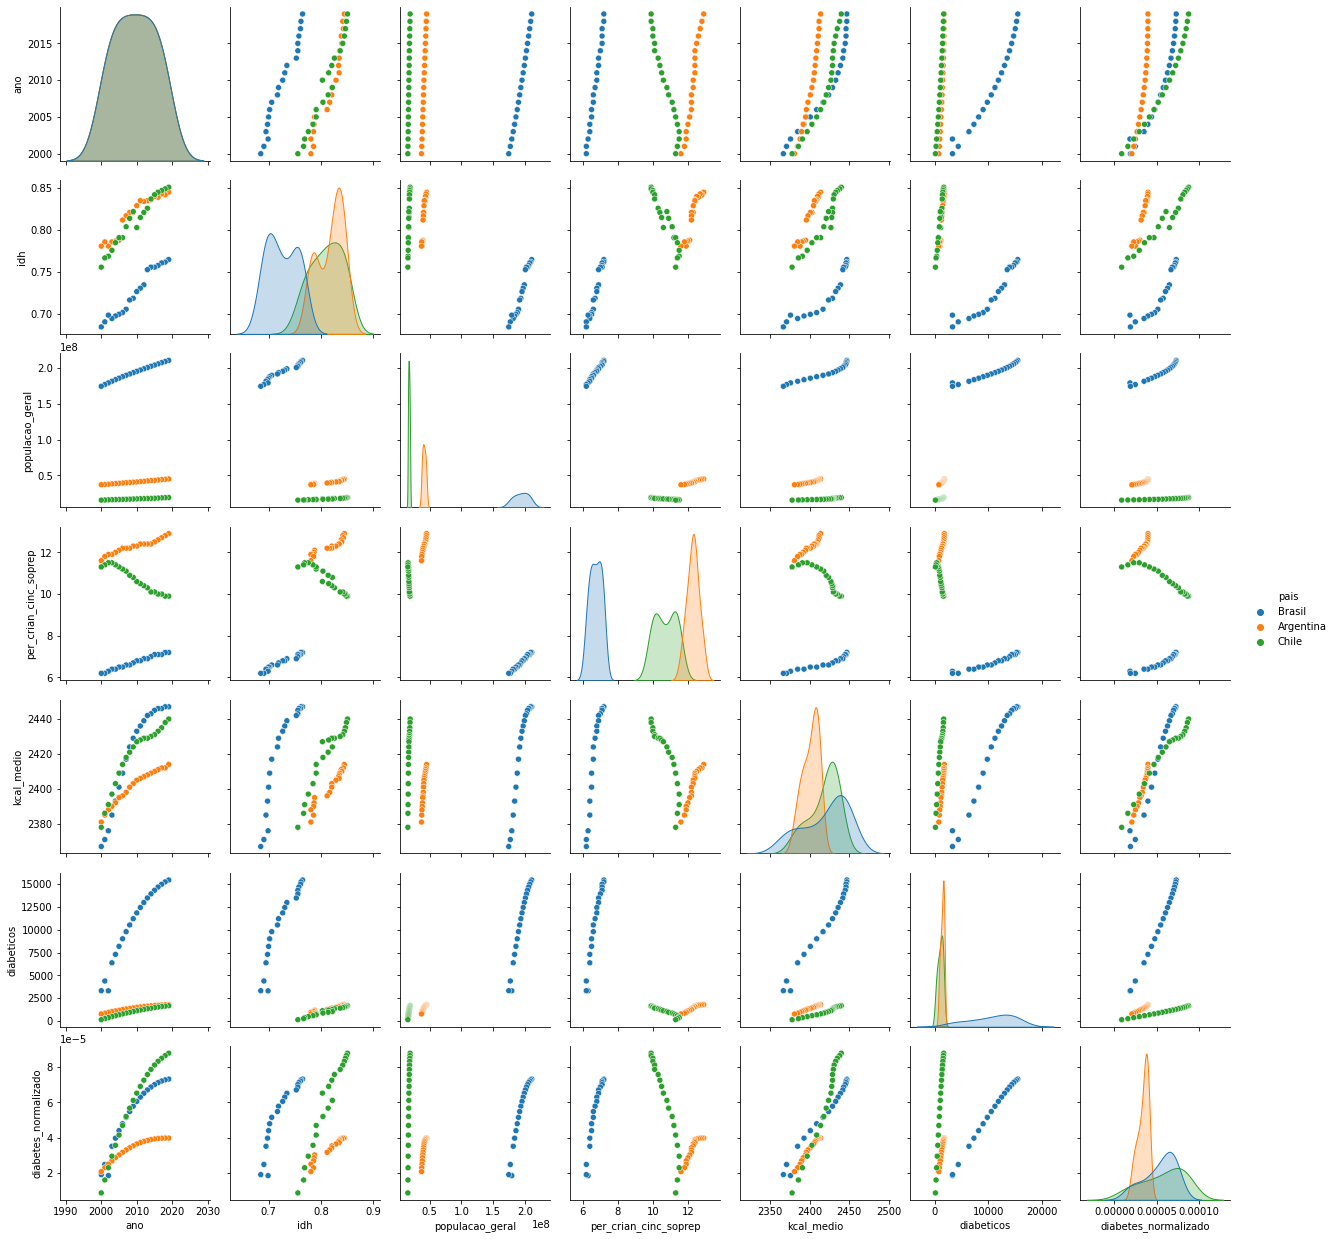

In [ ]:
sns.pairplot(df_atualizado, hue='pais')
plt.show() ## plotamos alguns gráficos usando pairplot

Com os gráficos acima, podemos perceber que o comportamento do Chile e da Argentina são bem semelhantes, enquanto o comportamento do Brasil se diferencia bastante em relação a eles.

Transformando Argentina, Brasil e Chile em números usando a função OneHotEncoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df_atualizado[['pais']])

print(transformed.toarray())
print(ohe.categories_)
df_atualizado[ohe.categories_[0]] = transformed.toarray()
print(df_atualizado.head())

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[array(['Argentina', 'Brasil', 'Chile'], dtype=object)]
    ano    pais    idh  populacao_geral  per_crian_cinc_soprep  kcal_medio  \
2  2019  Brasil  0.765        211049519                    7.2        2447   
3  2018  Brasil  0.762        209469320                    7.2     

### Separando parte dos dados para treino e teste do machine learning

In [ ]:
from sklearn.model_selection import train_test_split

Tam_Teste = 0.15
Semente_Aleatoria = 623119
dataset_name = "df_atualizado"
features = ['ano', 'idh', 'populacao_geral', 'per_crian_cinc_soprep',
       'kcal_medio', 'diabeticos', 'Argentina', 'Brasil','Chile']
target = ['diabetes_normalizado']


indices = df_atualizado.index
indices_treino, indices_teste = train_test_split(indices, test_size = Tam_Teste, random_state=Semente_Aleatoria)

df_treino = df_atualizado.loc[indices_treino]
df_teste = df_atualizado.loc[indices_teste]

X_treino = df_treino.reindex(features, axis=1).values
y_treino = df_treino.reindex(target, axis=1).values
X_teste = df_teste.reindex(features, axis=1).values
y_teste = df_teste.reindex(target, axis=1).values

print("Treino:")
print(df_treino)
print()
print("Teste:")
print(df_teste)


Treino:
     ano       pais    idh  populacao_geral  per_crian_cinc_soprep  \
39  2004  Argentina  0.787         38491970                   12.0   
17  2004     Brasil  0.698        184006479                    6.4   
33  2010  Argentina  0.829         40788453                   12.3   
13  2008     Brasil  0.717        192030362                    6.6   
36  2007  Argentina  0.817         39684303                   12.2   
8   2013     Brasil  0.753        201035904                    6.9   
63  2002      Chile  0.769         15684413                   11.5   
2   2019     Brasil  0.765        211049519                    7.2   
6   2015     Brasil  0.756        204471759                    7.1   
24  2019  Argentina  0.845         44938712                   12.9   
40  2003  Argentina  0.786         38087866                   11.9   
31  2012  Argentina  0.834         41733271                   12.4   
37  2006  Argentina  0.812         39289876                   12.2   
35  2008  Ar

**Baseline:**

In [ ]:
from sklearn.dummy import DummyRegressor
 
# cria um modelo de baseline
baseline = DummyRegressor()

# treina o modelo de baseline
baseline.fit(X_treino, y_treino)

# previsão que esse modelo retornará
previsao = baseline.predict(X_teste)
print(previsao)


[4.80218474e-05 4.80218474e-05 4.80218474e-05 4.80218474e-05
 4.80218474e-05 4.80218474e-05 4.80218474e-05 4.80218474e-05
 4.80218474e-05]


In [ ]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE}.")

O RMSE do modelo baseline foi de 2.0031510155756037e-05.


####**Modelo linear:**

Sem normalização:

In [ ]:
from sklearn.linear_model import LinearRegression

# criando o modelo
modelo_linear = LinearRegression()

# treinando o modelo
modelo_linear.fit(X_treino, y_treino)

# Fazer previsão usando o modelo treinado
previsao = modelo_linear.predict(X_teste)
print(previsao)

[[8.30639248e-05]
 [5.64153488e-05]
 [5.05107174e-05]
 [2.35238628e-05]
 [7.06590636e-05]
 [3.73871393e-05]
 [6.95935204e-05]
 [3.03693609e-05]
 [2.70322424e-05]]


In [ ]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE} diabéticos")

O RMSE do modelo linear foi de 1.92526433052614e-06 diabéticos


**Normalização**

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

normalizador = MinMaxScaler()

normalizador.fit(X_treino)
X_treino_norm = scaler.transform(X_treino)
print(X_treino_norm)
normalizador.fit(y_treino)


NameError: ignored

Modelo linear com após a normalização:

In [ ]:
# Criando o modelo
modelo_linear = LinearRegression()

# Treinando o modelo
modelo_linear.fit(
    normalizador_x.transform(X_treino),
    normalizador_y.transform(y_treino),
)

# realizando a previsão usando o modelo treinado

previsao = modelo_linear.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[[2.69738150e-05]
 [3.64453654e-05]
 [3.72416358e-05]
 [5.76900062e-05]
 [3.17703518e-05]
 [6.98602394e-05]
 [2.19557845e-05]
 [7.00205606e-05]
 [6.96861378e-05]
 [3.95809502e-05]
 [2.64310764e-05]
 [3.83315977e-05]
 [2.96631694e-05]
 [3.44433432e-05]
 [6.99664140e-05]
 [8.89482131e-05]
 [9.09359184e-05]
 [7.81063608e-05]
 [3.48791327e-05]
 [1.38123597e-05]
 [3.90405827e-05]
 [1.83253827e-05]
 [2.21426829e-05]
 [4.11218593e-05]
 [6.08737972e-05]
 [6.25744015e-05]
 [4.70682765e-05]
 [2.43025334e-05]
 [7.34707288e-05]
 [6.51762854e-05]
 [4.00940244e-05]
 [6.64119238e-05]
 [2.26865059e-05]
 [3.98286357e-05]
 [6.02770553e-05]
 [6.47242669e-05]
 [8.50372097e-05]
 [6.81658312e-05]
 [5.18267386e-05]
 [2.15095147e-05]
 [4.04678837e-05]
 [1.91693547e-05]
 [7.04965907e-05]
 [2.81559965e-05]
 [4.00676234e-05]
 [4.50395928e-05]
 [3.94109847e-05]
 [4.04852743e-05]
 [3.35405111e-05]
 [7.96986620e-05]
 [7.11810768e-05]]


In [ ]:
y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(normalizador_x.transform(X_teste))
y_previsao = normalizador_y.inverse_transform(y_previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}")

O RMSE do modelo linear foi de 1.9252645782826384e-06


####**Modelo KNN:**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao)

ValueError: ignored

In [ ]:
from sklearn.metrics import mean_squared

**Árvore de decisão**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=Semente_Aleatoria)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao)

[8.50386036e-05 6.11328172e-05 4.68800435e-05 2.48810147e-05
 7.27839285e-05 3.77995772e-05 6.70526992e-05 2.47110473e-05
 3.01365873e-05]


In [ ]:
from itertools import product

NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=Semente_Aleatoria,
    )

    modelo_dt.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} dólares."
    )

NameError: ignored